In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('Grammy Award Nominees and Winners 1958-2024.csv')
df

,Unnamed: 0,Year,Ceremony,Award ID,Award Type,Award Name,Work,Nominee,Winner
0,0,1958,1,587,Work,Best Recording For Children,Childrens' Marching Song (Album),Cyril Stapleton,False
1,1,1958,1,587,Work,Best Recording For Children,"Mommy, Give Me A Drinka Water (Album)",Danny Kaye,False
2,2,1958,1,587,Work,Best Recording For Children,The Witch Doctor,David Seville And The Chipmunks,False
3,3,1958,1,587,Work,Best Recording For Children,Tubby The Tuba,Jose Ferrer,False
4,4,1958,1,587,Work,Best Recording For Children,Fun In Shariland (Album),Shari Lewis And Lambchop,False
...,...,...,...,...,...,...,...,...,...
25300,25300,2024,67,2432,Work,Best Dance Pop Recording,"yes, and?",Ariana Grande,False
25301,25301,2024,67,2432,Work,Best Dance Pop Recording,L’AMOUR DE MA VIE [OVER NOW EXTENDED EDIT],Billie Eilish,False
25302,25302,2024,67,2432,Work,Best Dance Pop Recording,Make You Mine,Madison Beer,False
25303,25303,2024,67,2432,Work,Best Dance Pop Recording,Got Me Started,Troye Sivan,False


In [21]:
df = df.dropna() 
df['Winner'] = df['Winner'].astype(bool) 

C:\Users\Twin\AppData\Local\Temp\ipykernel_14356\3093371565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Winner'] = df['Winner'].astype(bool)


In [22]:
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0  Year  Ceremony  Award ID Award Type  \
0           0  1958         1       587       Work   
1           1  1958         1       587       Work   
2           2  1958         1       587       Work   
3           3  1958         1       587       Work   
4           4  1958         1       587       Work   

                    Award Name                                   Work  \
0  Best Recording For Children       Childrens' Marching Song (Album)   
1  Best Recording For Children  Mommy, Give Me A Drinka Water (Album)   
2  Best Recording For Children                       The Witch Doctor   
3  Best Recording For Children                         Tubby The Tuba   
4  Best Recording For Children               Fun In Shariland (Album)   

                           Nominee  Winner  
0                  Cyril Stapleton   False  
1                       Danny Kaye   False  
2  David Seville And The Chipmunks   False  
3                      Jose Ferrer   False  
4         S

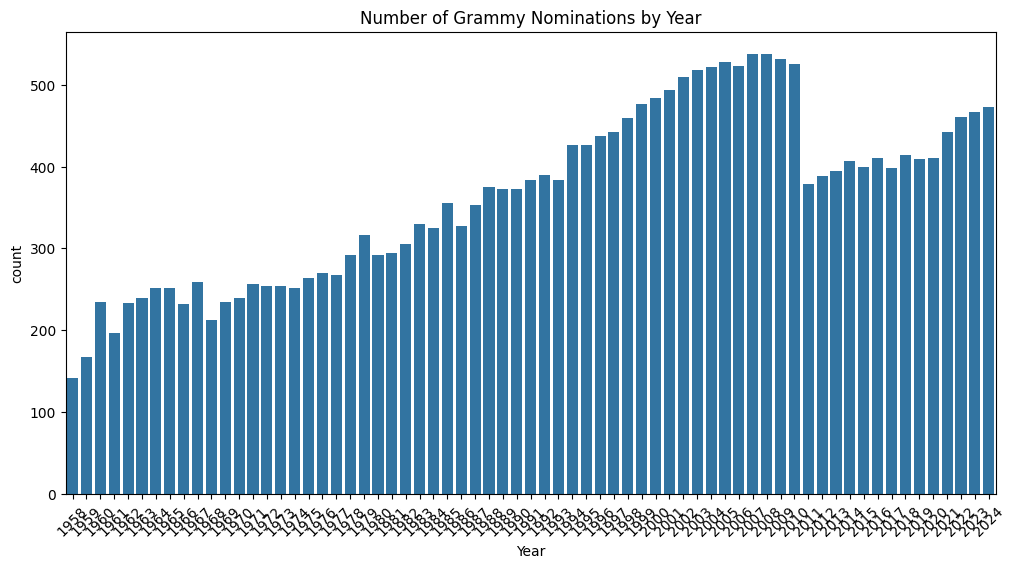

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df)
plt.title('Number of Grammy Nominations by Year')
plt.xticks(rotation=45)
plt.show()

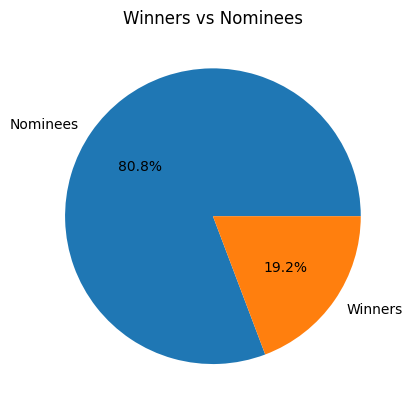

In [24]:
winner_counts = df['Winner'].value_counts()
plt.pie(winner_counts, labels=['Nominees', 'Winners'], autopct='%1.1f%%')
plt.title('Winners vs Nominees')
plt.show()

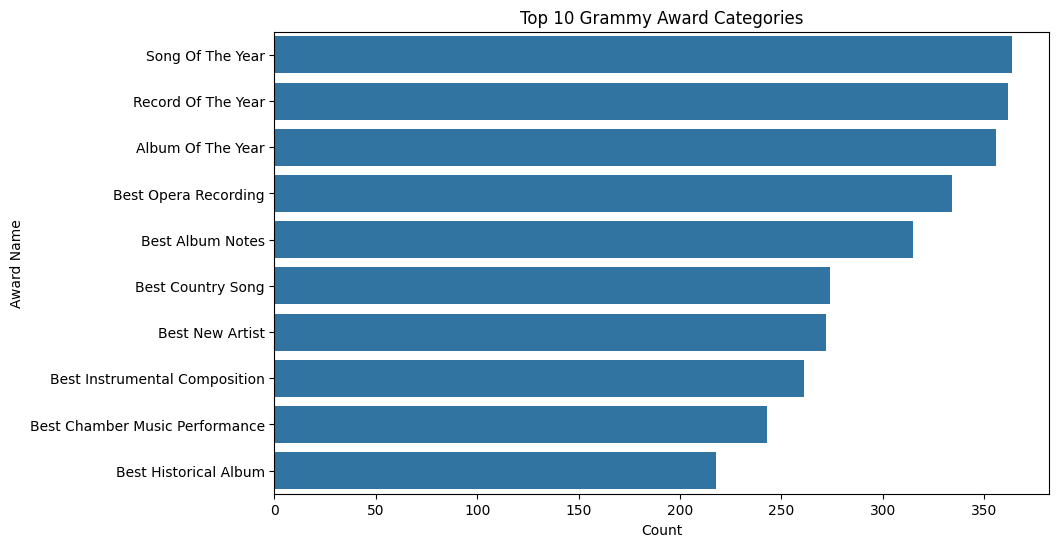

In [7]:
top_categories = df['Award Name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Grammy Award Categories')
plt.xlabel('Count')
plt.show()

In [9]:
le = LabelEncoder()
df['Award_encoded'] = le.fit_transform(df['Award Name'])
df['Year_norm'] = (df['Year'] - df['Year'].min()) / (df['Year'].max() - df['Year'].min())

In [10]:
X = df[['Year_norm', 'Award_encoded']]
y = df['Winner']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7747629083245522
              precision    recall  f1-score   support

       False       0.80      0.97      0.87      6088
        True       0.00      0.00      0.00      1504

    accuracy                           0.77      7592
   macro avg       0.40      0.48      0.44      7592
weighted avg       0.64      0.77      0.70      7592



In [15]:
award_names = df['Award Name'].unique()
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(award_names)

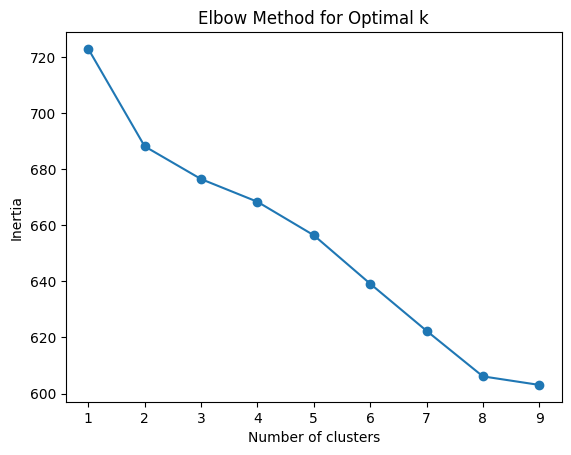

In [16]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)


In [18]:
for i in range(4):
    print(f"\nCluster {i+1}:")
    print(award_names[clusters == i][:5])


Cluster 1:
['Record Of The Year' 'Album Of The Year' 'Song Of The Year'
 'Album Of The Year - Classical'
 'Best Instrumental Theme Or Instrumental Version Of Song']

Cluster 2:
['Best Recording For Children'
 'Best Classical Performance - Instrumentalist (With Concerto Scale Accompaniment)'
 'Best Classical Performance - Instrumentalist (Other Than Concerto-Scale Accompaniment)'
 'Best Musical Composition First Recorded And Released In 1958 (Over 5 Minutes Duration)'
 'Best Arrangement']

Cluster 3:
['Best Performance, Documentary Or Spoken Word' 'Best Comedy Performance'
 'Best Performance - Documentary Or Spoken Word (Other Than Comedy)'
 'Best Comedy Performance - Musical'
 'Best Comedy Performance - Spoken Word']

Cluster 4:
['Best Classical Performance - Operatic Or Choral'
 'Best Classical Performance - Orchestra'
 'Best Classical Performance - Chamber Music (Including Chamber Orchestra)'
 'Best Jazz Performance, Individual' 'Best Jazz Performance, Group']
